In [1]:
# #Unpack .rar file directly from Google Drive and store it also on Drive
# #Source: https://stackoverflow.com/questions/50315989/how-to-extract-rar-files-inside-google-colab

# !pip install pyunpack
# !pip install patool

# from google.colab import drive

# drive.mount('/content/drive/')

# from pyunpack import Archive
# Archive(r'/content/drive/My Drive/Copy of data.rar').extractall(r'/content/drive/My Drive')

# Package & Settings

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive

In [3]:
#Setting to display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Setting to display all rows & columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Data Read

In [4]:
drive.mount('/content/drive/')

folder_path = "/content/drive/My Drive/Machine Learning Sample Credit Prediction/"
application_train = pd.read_csv(folder_path+'application_train.csv')
previous_application = pd.read_csv(folder_path+'previous_application.csv')
installments_payment = pd.read_csv(folder_path+'installments_payments.csv')
bureau = pd.read_csv(folder_path+'bureau.csv')
bureau_balance = pd.read_csv(folder_path+'bureau_balance.csv')
pos_cash_balance = pd.read_csv(folder_path+'POS_CASH_balance.csv')
credit_card_balance = pd.read_csv(folder_path+'credit_card_balance.csv')

sample_submission = pd.read_csv(folder_path+'sample_submission.csv')
application_test = pd.read_csv(folder_path+'application_test.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Column Dropping (assumed based on Domain Knowledge)

Most of the time, loan approval was mostly determined by the current economical conditions of the clients (including ongoing and finished loans), and client performance on past mortgage

So, by reading the column description, we will choose columns with adequate informations regarding their conditions

In [5]:
application_col_to_drop = ['REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                           'NAME_TYPE_SUITE','REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 
                           'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                           'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
                           'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
                           'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
                           'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
                           'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
                           'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
                           'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
                           'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
                           'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
                           'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
                           'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
                           'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

application_train.drop(columns = application_col_to_drop, inplace=True)
application_test.drop(columns = application_col_to_drop, inplace=True)

In [6]:
previous_application_to_drop = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
                                'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'NAME_TYPE_SUITE',
                                'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
                                'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
                                'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 
                                'NFLAG_INSURED_ON_APPROVAL', 'NAME_GOODS_CATEGORY', 'NAME_CASH_LOAN_PURPOSE']
previous_application.drop(columns = previous_application_to_drop, inplace=True)

In [7]:
installments_payment_to_drop = ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER']
installments_payment.drop(columns = installments_payment_to_drop, inplace=True)

In [8]:
pos_cash_balance_to_drop = ['MONTHS_BALANCE', 'CNT_INSTALMENT']
pos_cash_balance.drop(columns = pos_cash_balance_to_drop, inplace=True)

In [9]:
bureau_merged = bureau.merge(bureau_balance, how='inner', on = 'SK_ID_BUREAU')
del bureau, bureau_balance

#Data Investigation & Cleansing

## Application DF

In [10]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [11]:
null_columns=application_train.columns[application_train.isnull().any()]
application_train[null_columns].isnull().sum()

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
dtype: int64

In [12]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_INCOME_TYPE             48744 non-null  object 
 11  NAME_EDUCATION_TYPE          48744 non-null  object 
 12  NAME_FAMILY_STATUS           48744 non-null  object 
 13  NAME_HOUSING_TYP

In [13]:
null_columns=application_test.columns[application_test.isnull().any()]
application_test[null_columns].isnull().sum()

AMT_ANNUITY                      24
OWN_CAR_AGE                   32312
OCCUPATION_TYPE               15605
OBS_30_CNT_SOCIAL_CIRCLE         29
DEF_30_CNT_SOCIAL_CIRCLE         29
OBS_60_CNT_SOCIAL_CIRCLE         29
DEF_60_CNT_SOCIAL_CIRCLE         29
AMT_REQ_CREDIT_BUREAU_HOUR     6049
AMT_REQ_CREDIT_BUREAU_DAY      6049
AMT_REQ_CREDIT_BUREAU_WEEK     6049
AMT_REQ_CREDIT_BUREAU_MON      6049
AMT_REQ_CREDIT_BUREAU_QRT      6049
AMT_REQ_CREDIT_BUREAU_YEAR     6049
dtype: int64

In [14]:
#fill NA
application_train.OCCUPATION_TYPE=application_train.OCCUPATION_TYPE.fillna('Others')
application_test.OCCUPATION_TYPE=application_test.OCCUPATION_TYPE.fillna('Others')

application_train.DAYS_LAST_PHONE_CHANGE=application_train.DAYS_LAST_PHONE_CHANGE.fillna(0)
application_train.CNT_FAM_MEMBERS=application_train.CNT_FAM_MEMBERS.fillna(application_train.CNT_FAM_MEMBERS.median())

application_train.AMT_GOODS_PRICE=application_train.AMT_GOODS_PRICE.fillna(application_train.AMT_GOODS_PRICE.median())

application_train.AMT_ANNUITY=application_train.AMT_ANNUITY.fillna(application_train.AMT_GOODS_PRICE.mean())
application_test.AMT_ANNUITY=application_test.AMT_ANNUITY.fillna(application_train.AMT_GOODS_PRICE.mean())

application_train.OWN_CAR_AGE=application_train.OWN_CAR_AGE.fillna(-99)
application_test.OWN_CAR_AGE=application_test.OWN_CAR_AGE.fillna(-99)

cols_social_circle = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
application_train[cols_social_circle] = application_train[cols_social_circle].fillna(-99)
application_test[cols_social_circle] = application_test[cols_social_circle].fillna(-99)

cols_req_bureau = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                   'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_train[cols_req_bureau] = application_train[cols_req_bureau].fillna(-99)
application_test[cols_req_bureau] = application_test[cols_req_bureau].fillna(-99)

In [15]:
categoricals = np.union1d(application_train.select_dtypes(['object']).columns, application_test.select_dtypes(['object']).columns)
for cat in categoricals:
  unique_values = list(set(application_train[cat].values).union(set(application_test[cat].values)))
  application_train[cat] = pd.Categorical(application_train[cat], categories=unique_values)
  application_test[cat] = pd.Categorical(application_test[cat], categories=unique_values)

In [16]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [17]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   48744 non-null  int64   
 1   NAME_CONTRACT_TYPE           48744 non-null  category
 2   CODE_GENDER                  48744 non-null  category
 3   FLAG_OWN_CAR                 48744 non-null  category
 4   FLAG_OWN_REALTY              48744 non-null  category
 5   CNT_CHILDREN                 48744 non-null  int64   
 6   AMT_INCOME_TOTAL             48744 non-null  float64 
 7   AMT_CREDIT                   48744 non-null  float64 
 8   AMT_ANNUITY                  48744 non-null  float64 
 9   AMT_GOODS_PRICE              48744 non-null  float64 
 10  NAME_INCOME_TYPE             48744 non-null  category
 11  NAME_EDUCATION_TYPE          48744 non-null  category
 12  NAME_FAMILY_STATUS           48744 non-null  category
 13  N

In [18]:
null_columns=application_train.columns[application_train.isnull().any()]
display(application_train[null_columns].isnull().sum())

null_columns=application_test.columns[application_test.isnull().any()]
display(application_test[null_columns].isnull().sum())

Series([], dtype: float64)

Series([], dtype: float64)

In [19]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-99.0,1,1,0,1,1,0,Laborers,1.0,2,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-99.0,1,1,0,1,1,0,Core staff,2.0,1,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,1,1,1,1,1,0,Laborers,1.0,2,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-99.0,1,1,0,1,0,0,Laborers,2.0,2,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-99.0,1,1,0,1,0,0,Core staff,1.0,2,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Working,Higher education,Married,House / apartment,-19241,-2329,-99.0,1,1,0,1,0,1,Others,2.0,2,0,0,0,0,0,0,Kindergarten,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-18064,-4469,-99.0,1,1,0,1,0,0,Low-skill Laborers,2.0,2,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Working,Higher education,Married,House / apartment,-20038,-4458,5.0,1,1,0,1,0,0,Drivers,2.0,2,0,0,0,0,0,0,Transport: type 3,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Working,Secondary / secondary special,Married,House / apartment,-13976,-1866,-99.0,1,1,0,1,1,0,Sales staff,4.0,2,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Working,Secondary / secondary special,Married,House / apartment,-13040,-2191,16.0,1,1,1,1,0,0,Others,3.0,2,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


No nulls anymore and it's on the correct formatting. Now we will move on into different table to extract some more informations

## Previous Application DF

In [21]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   SK_ID_PREV                1670214 non-null  int64  
 1   SK_ID_CURR                1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE        1670214 non-null  object 
 3   AMT_ANNUITY               1297979 non-null  float64
 4   AMT_APPLICATION           1670214 non-null  float64
 5   AMT_CREDIT                1670213 non-null  float64
 6   AMT_DOWN_PAYMENT          774370 non-null   float64
 7   AMT_GOODS_PRICE           1284699 non-null  float64
 8   RATE_DOWN_PAYMENT         774370 non-null   float64
 9   RATE_INTEREST_PRIMARY     5951 non-null     float64
 10  RATE_INTEREST_PRIVILEGED  5951 non-null     float64
 11  NAME_CONTRACT_STATUS      1670214 non-null  object 
 12  CODE_REJECT_REASON        1670214 non-null  object 
 13  NAME_CLIENT_TYPE          1

In [22]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 16 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   SK_ID_PREV                1670214 non-null  int64  
 1   SK_ID_CURR                1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE        1670214 non-null  object 
 3   AMT_ANNUITY               1297979 non-null  float64
 4   AMT_APPLICATION           1670214 non-null  float64
 5   AMT_CREDIT                1670213 non-null  float64
 6   AMT_DOWN_PAYMENT          774370 non-null   float64
 7   AMT_GOODS_PRICE           1284699 non-null  float64
 8   RATE_DOWN_PAYMENT         774370 non-null   float64
 9   RATE_INTEREST_PRIMARY     5951 non-null     float64
 10  RATE_INTEREST_PRIVILEGED  5951 non-null     float64
 11  NAME_CONTRACT_STATUS      1670214 non-null  object 
 12  CODE_REJECT_REASON        1670214 non-null  object 
 13  NAME_CLIENT_TYPE          1

In [23]:
# previous_application.sort_values(by=['SK_ID_CURR','SK_ID_PREV'], inplace=True)
categorical_columns=['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','CODE_REJECT_REASON',
                    'NAME_CLIENT_TYPE','NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE']

previous_application_summary = pd.DataFrame(index=(set(previous_application['SK_ID_CURR'].values)))

for cat in categorical_columns:
  grouped = previous_application.groupby(['SK_ID_CURR', cat])['SK_ID_PREV'].agg(['count']).unstack(level=-1)
  grouped.columns = grouped.columns.get_level_values(1).map(lambda x: grouped.columns.names[1]+'_'+x.upper())
  previous_application_summary = previous_application_summary.merge(grouped, how='left', left_index=True, right_index=True)

previous_application_summary.fillna(0, inplace=True) #NA entries means no count so it will be imputted with 0

In [24]:
numerical_cols = np.setdiff1d(previous_application.select_dtypes(['int64','float64']).columns, ['SK_ID_PREV', 'SK_ID_CURR'])
grouped = previous_application.groupby(['SK_ID_CURR'])[numerical_cols].agg(['mean', 'sum'])
grouped.columns = grouped.columns.map('_'.join).str.upper()

In [25]:
previous_application_summary = previous_application_summary.merge(grouped, how='left', left_index=True, right_index=True)

In [26]:
null_columns=previous_application_summary.columns[previous_application_summary.isnull().any()]
previous_application_summary[null_columns].isnull().sum()

AMT_ANNUITY_MEAN                    480
AMT_DOWN_PAYMENT_MEAN             20104
AMT_GOODS_PRICE_MEAN               1064
RATE_DOWN_PAYMENT_MEAN            20104
RATE_INTEREST_PRIMARY_MEAN       333136
RATE_INTEREST_PRIVILEGED_MEAN    333136
dtype: int64

In [27]:
del previous_application
previous_application_summary.head()

,NAME_CONTRACT_TYPE_CASH LOANS,NAME_CONTRACT_TYPE_CONSUMER LOANS,NAME_CONTRACT_TYPE_REVOLVING LOANS,NAME_CONTRACT_TYPE_XNA,NAME_CONTRACT_STATUS_APPROVED,NAME_CONTRACT_STATUS_CANCELED,NAME_CONTRACT_STATUS_REFUSED,NAME_CONTRACT_STATUS_UNUSED OFFER,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_CLIENT_TYPE_NEW,NAME_CLIENT_TYPE_REFRESHED,NAME_CLIENT_TYPE_REPEATER,NAME_CLIENT_TYPE_XNA,NAME_PORTFOLIO_CARDS,NAME_PORTFOLIO_CARS,NAME_PORTFOLIO_CASH,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_WALK-IN,NAME_PRODUCT_TYPE_X-SELL,AMT_ANNUITY_MEAN,AMT_ANNUITY_SUM,AMT_APPLICATION_MEAN,AMT_APPLICATION_SUM,AMT_CREDIT_MEAN,AMT_CREDIT_SUM,AMT_DOWN_PAYMENT_MEAN,AMT_DOWN_PAYMENT_SUM,AMT_GOODS_PRICE_MEAN,AMT_GOODS_PRICE_SUM,RATE_DOWN_PAYMENT_MEAN,RATE_DOWN_PAYMENT_SUM,RATE_INTEREST_PRIMARY_MEAN,RATE_INTEREST_PRIMARY_SUM,RATE_INTEREST_PRIVILEGED_MEAN,RATE_INTEREST_PRIVILEGED_SUM
100001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3951.000,3951.000,24835.50,24835.5,23787.00,23787.0,2520.0,2520.0,24835.5,24835.5,0.104326,0.104326,NaN,0.0,NaN,0.0
100002,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9251.775,9251.775,179055.00,179055.0,179055.00,179055.0,0.0,0.0,179055.0,179055.0,0.000000,0.000000,NaN,0.0,NaN,0.0
100003,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,56553.990,169661.970,435436.50,1306309.5,484191.00,1452573.0,3442.5,6885.0,435436.5,1306309.5,0.050030,0.100061,NaN,0.0,NaN,0.0
100004,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5357.250,5357.250,24282.00,24282.0,20106.00,20106.0,4860.0,4860.0,24282.0,24282.0,0.212008,0.212008,NaN,0.0,NaN,0.0
100005,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,4813.200,4813.200,22308.75,44617.5,20076.75,40153.5,4464.0,4464.0,44617.5,44617.5,0.108964,0.108964,NaN,0.0,NaN,0.0


## Instalment Payment DF

In [28]:
# installments_payment.sort_values(by=['SK_ID_CURR','SK_ID_PREV'], inplace=True)
installments_payment['DAYS_ENTRY_PAYMENT'].fillna(-1, inplace=True)
installments_payment['LATE_DAYS']=np.where(installments_payment['DAYS_ENTRY_PAYMENT']-installments_payment['DAYS_INSTALMENT']>0,installments_payment['DAYS_ENTRY_PAYMENT']-installments_payment['DAYS_INSTALMENT'],0)

installments_payment['AMT_PAYMENT'].fillna(0, inplace=True)
installments_payment['AMT_UNPAID']=(installments_payment['AMT_INSTALMENT']-installments_payment['AMT_PAYMENT'])
installments_payment.drop(['DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT','AMT_INSTALMENT','AMT_PAYMENT'], axis=1, inplace=True)

In [29]:
installments_payment_summary = installments_payment.groupby(['SK_ID_CURR'])['LATE_DAYS', 'AMT_UNPAID'].agg(['mean', 'sum', 'max'])
installments_payment_summary.columns = installments_payment_summary.columns.map('_'.join).str.upper().to_list()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [30]:
null_columns=installments_payment_summary.columns[installments_payment_summary.isnull().any()]
installments_payment_summary[null_columns].isnull().sum()

Series([], dtype: float64)

In [31]:
del installments_payment
installments_payment_summary.head()

,LATE_DAYS_MEAN,LATE_DAYS_SUM,LATE_DAYS_MAX,AMT_UNPAID_MEAN,AMT_UNPAID_SUM,AMT_UNPAID_MAX
SK_ID_CURR,,,,,,
100001,1.571429,11.0,11.0,0.0,0.0,0.0
100002,0.000000,0.0,0.0,0.0,0.0,0.0
100003,0.000000,0.0,0.0,0.0,0.0,0.0
100004,0.000000,0.0,0.0,0.0,0.0,0.0
100005,0.111111,1.0,1.0,0.0,0.0,0.0


## Bureau Merged DF

In [32]:
null_columns=bureau_merged.columns[bureau_merged.isnull().any()]
bureau_merged[null_columns].isnull().sum()

DAYS_CREDIT_ENDDATE        1177501
DAYS_ENDDATE_FACT          5628643
AMT_CREDIT_MAX_OVERDUE    17545903
AMT_CREDIT_SUM                   5
AMT_CREDIT_SUM_DEBT        4089077
AMT_CREDIT_SUM_LIMIT      10376144
AMT_ANNUITY                9553957
dtype: int64

In [33]:
bureau_merged['DAYS_CREDIT_ENDDATE'] = np.where(bureau_merged['DAYS_CREDIT_ENDDATE']<0, 0, bureau_merged['DAYS_CREDIT_ENDDATE'])
bureau_merged['AMT_CREDIT_SUM_DEBT'] = np.where(bureau_merged['AMT_CREDIT_SUM_DEBT']<0, 0, bureau_merged['AMT_CREDIT_SUM_DEBT'])
bureau_merged['AMT_CREDIT_SUM_LIMIT'] = np.where(bureau_merged['AMT_CREDIT_SUM_LIMIT']<0, 0, bureau_merged['AMT_CREDIT_SUM_LIMIT'])
bureau_merged['DAYS_ENDDATE_FACT'].fillna(0, inplace=True)

In [34]:
bureau_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24179741 entries, 0 to 24179740
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
 17  MONTHS_BALANCE          int64  
 18  STATUS                  object 
dtypes: float64(8), int64(7), object(4)
memory usage: 3.6+ GB


In [35]:
# #temp values for no info
# bureau_merged['DAYS_CREDIT_ENDDATE'].fillna(-99, inplace=True)
# bureau_merged['AMT_CREDIT_SUM_DEBT'].fillna(-99, inplace=True)
# bureau_merged['AMT_CREDIT_SUM_LIMIT'].fillna(-99, inplace=True)
# bureau_merged['AMT_CREDIT_MAX_OVERDUE'].fillna(-99, inplace=True)
# bureau_merged['AMT_CREDIT_SUM'].fillna(-99, inplace=True)
# bureau_merged['AMT_ANNUITY'].fillna(-99, inplace=True)

In [36]:
bureau_summary = pd.DataFrame(index=(set(bureau_merged['SK_ID_CURR'].values)))

for cat in bureau_merged.select_dtypes(['object']).columns.to_list():
  grouped = bureau_merged.groupby(['SK_ID_CURR', cat])['SK_ID_BUREAU'].agg(['count']).unstack(level=-1)
  grouped.columns = grouped.columns.get_level_values(1).map(lambda x: grouped.columns.names[1]+'_'+x.upper())
  bureau_summary = bureau_summary.merge(grouped, how='left', left_index=True, right_index=True)

bureau_summary.fillna(0, inplace=True) #NA entries means no count so it will be imputted with 0

In [37]:
numerical_cols = np.setdiff1d(bureau_merged.select_dtypes(['int64','float64']).columns, ['SK_ID_BUREAU', 'SK_ID_CURR'])

In [38]:
grouped = bureau_merged.groupby(['SK_ID_CURR'])[numerical_cols].agg(['sum'])
grouped.columns = grouped.columns.map('_'.join).str.upper()

In [39]:
bureau_summary = bureau_summary.merge(grouped, how='left', left_index=True, right_index=True)

In [40]:
null_columns=bureau_summary.columns[bureau_summary.isnull().any()]
bureau_summary[null_columns].isnull().sum()

Series([], dtype: float64)

# Exploratory Data Analysis (Dimensionality Reduction)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Next, we will do the EDA. One is correlation checking and the other one is data clustering to reduce the dimensionality of the data while preserving valuable informations

For the EDA Order (based on Dataframe):


1.   Previous Application DF
2.   Bureau Merged DF
3.   Application DF (Train and Test)

For the Instalment Payment DF, we won't do Feature Engineering because of it already contains small amount of features (or columns)



## Previous Application DF

In [42]:
previous_application_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 100001 to 456255
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   NAME_CONTRACT_TYPE_CASH LOANS       338857 non-null  float64
 1   NAME_CONTRACT_TYPE_CONSUMER LOANS   338857 non-null  float64
 2   NAME_CONTRACT_TYPE_REVOLVING LOANS  338857 non-null  float64
 3   NAME_CONTRACT_TYPE_XNA              338857 non-null  float64
 4   NAME_CONTRACT_STATUS_APPROVED       338857 non-null  float64
 5   NAME_CONTRACT_STATUS_CANCELED       338857 non-null  float64
 6   NAME_CONTRACT_STATUS_REFUSED        338857 non-null  float64
 7   NAME_CONTRACT_STATUS_UNUSED OFFER   338857 non-null  float64
 8   CODE_REJECT_REASON_CLIENT           338857 non-null  float64
 9   CODE_REJECT_REASON_HC               338857 non-null  float64
 10  CODE_REJECT_REASON_LIMIT            338857 non-null  float64
 11  CODE_REJECT_REASON_SC

In [43]:
previous_application_summary.columns

Index(['NAME_CONTRACT_TYPE_CASH LOANS', 'NAME_CONTRACT_TYPE_CONSUMER LOANS',
       'NAME_CONTRACT_TYPE_REVOLVING LOANS', 'NAME_CONTRACT_TYPE_XNA',
       'NAME_CONTRACT_STATUS_APPROVED', 'NAME_CONTRACT_STATUS_CANCELED',
       'NAME_CONTRACT_STATUS_REFUSED', 'NAME_CONTRACT_STATUS_UNUSED OFFER',
       'CODE_REJECT_REASON_CLIENT', 'CODE_REJECT_REASON_HC',
       'CODE_REJECT_REASON_LIMIT', 'CODE_REJECT_REASON_SCO',
       'CODE_REJECT_REASON_SCOFR', 'CODE_REJECT_REASON_SYSTEM',
       'CODE_REJECT_REASON_VERIF', 'CODE_REJECT_REASON_XAP',
       'CODE_REJECT_REASON_XNA', 'NAME_CLIENT_TYPE_NEW',
       'NAME_CLIENT_TYPE_REFRESHED', 'NAME_CLIENT_TYPE_REPEATER',
       'NAME_CLIENT_TYPE_XNA', 'NAME_PORTFOLIO_CARDS', 'NAME_PORTFOLIO_CARS',
       'NAME_PORTFOLIO_CASH', 'NAME_PORTFOLIO_POS', 'NAME_PORTFOLIO_XNA',
       'NAME_PRODUCT_TYPE_XNA', 'NAME_PRODUCT_TYPE_WALK-IN',
       'NAME_PRODUCT_TYPE_X-SELL', 'AMT_ANNUITY_MEAN', 'AMT_ANNUITY_SUM',
       'AMT_APPLICATION_MEAN', 'AMT_APPLICATIO

We will test out if the several clusters of categorical counts on the summary could be reduced using PCA. If the explained variance is more than 90%, we will shrink the feature because it's telling similar info (e.g. Name Contract Status History or Count)

In [44]:
pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

In [45]:
columns_chosen = ['NAME_CONTRACT_TYPE_CASH LOANS', 'NAME_CONTRACT_TYPE_CONSUMER LOANS',
                  'NAME_CONTRACT_TYPE_REVOLVING LOANS', 'NAME_CONTRACT_TYPE_XNA',
                  'NAME_CONTRACT_STATUS_APPROVED', 'NAME_CONTRACT_STATUS_CANCELED',
                  'NAME_CONTRACT_STATUS_REFUSED', 'NAME_CONTRACT_STATUS_UNUSED OFFER']
display(columns_chosen)

subset = previous_application_summary[columns_chosen]
pca_result = pca_3.fit_transform(subset)

display(pca_3.explained_variance_ratio_.sum())

['NAME_CONTRACT_TYPE_CASH LOANS',
 'NAME_CONTRACT_TYPE_CONSUMER LOANS',
 'NAME_CONTRACT_TYPE_REVOLVING LOANS',
 'NAME_CONTRACT_TYPE_XNA',
 'NAME_CONTRACT_STATUS_APPROVED',
 'NAME_CONTRACT_STATUS_CANCELED',
 'NAME_CONTRACT_STATUS_REFUSED',
 'NAME_CONTRACT_STATUS_UNUSED OFFER']

0.9014561540648476

In [46]:
pca_df = pd.DataFrame(pca_result, columns = ['NAME_CONTRACT_PC_1', 'NAME_CONTRACT_PC_2', 'NAME_CONTRACT_PC_3'],
             index=previous_application_summary.index)
previous_application_summary.drop(columns=columns_chosen, inplace=True)
previous_application_summary = previous_application_summary.merge(pca_df, left_index=True, right_index=True)

In [47]:
columns_chosen = ['CODE_REJECT_REASON_CLIENT', 'CODE_REJECT_REASON_HC', 'CODE_REJECT_REASON_LIMIT',
                  'CODE_REJECT_REASON_SCO', 'CODE_REJECT_REASON_SCOFR', 'CODE_REJECT_REASON_SYSTEM',
                  'CODE_REJECT_REASON_VERIF', 'CODE_REJECT_REASON_XAP', 'CODE_REJECT_REASON_XNA']
display(columns_chosen)

subset = previous_application_summary[columns_chosen]
pca_result = pca_2.fit_transform(subset)

display(pca_2.explained_variance_ratio_.sum())

['CODE_REJECT_REASON_CLIENT',
 'CODE_REJECT_REASON_HC',
 'CODE_REJECT_REASON_LIMIT',
 'CODE_REJECT_REASON_SCO',
 'CODE_REJECT_REASON_SCOFR',
 'CODE_REJECT_REASON_SYSTEM',
 'CODE_REJECT_REASON_VERIF',
 'CODE_REJECT_REASON_XAP',
 'CODE_REJECT_REASON_XNA']

0.9282263697723258

In [48]:
pca_df = pd.DataFrame(pca_result, columns = ['CODE_REJECT_REASON_PC_1', 'CODE_REJECT_REASON_PC_2'],
             index=previous_application_summary.index)
previous_application_summary.drop(columns=columns_chosen, inplace=True)
previous_application_summary = previous_application_summary.merge(pca_df, left_index=True, right_index=True)

In [49]:
columns_chosen = ['NAME_CLIENT_TYPE_NEW', 'NAME_CLIENT_TYPE_REFRESHED', 'NAME_CLIENT_TYPE_REPEATER', 
                  'NAME_CLIENT_TYPE_XNA']
display(columns_chosen)

subset = previous_application_summary[columns_chosen]
pca_result = pca_2.fit_transform(subset)

display(pca_2.explained_variance_ratio_.sum())

['NAME_CLIENT_TYPE_NEW',
 'NAME_CLIENT_TYPE_REFRESHED',
 'NAME_CLIENT_TYPE_REPEATER',
 'NAME_CLIENT_TYPE_XNA']

0.9836858484530172

In [50]:
pca_df = pd.DataFrame(pca_result, columns = ['NAME_CLIENT_TYPE_PC_1', 'NAME_CLIENT_TYPE_PC_2'],
             index=previous_application_summary.index)
previous_application_summary.drop(columns=columns_chosen, inplace=True)
previous_application_summary = previous_application_summary.merge(pca_df, left_index=True, right_index=True)

In [51]:
columns_chosen = ['NAME_PORTFOLIO_CARDS', 'NAME_PORTFOLIO_CARS', 'NAME_PORTFOLIO_CASH', 'NAME_PORTFOLIO_POS',
                  'NAME_PORTFOLIO_XNA']
display(columns_chosen)

subset = previous_application_summary[columns_chosen]
pca_result = pca_3.fit_transform(subset)

display(pca_3.explained_variance_ratio_.sum())

['NAME_PORTFOLIO_CARDS',
 'NAME_PORTFOLIO_CARS',
 'NAME_PORTFOLIO_CASH',
 'NAME_PORTFOLIO_POS',
 'NAME_PORTFOLIO_XNA']

0.9590317910354499

In [52]:
pca_df = pd.DataFrame(pca_result, columns = ['NAME_PORTFOLIO_PC_1', 'NAME_PORTFOLIO_PC_2', 'NAME_PORTFOLIO_PC_3'],
             index=previous_application_summary.index)
previous_application_summary.drop(columns=columns_chosen, inplace=True)
previous_application_summary = previous_application_summary.merge(pca_df, left_index=True, right_index=True)

In [53]:
columns_chosen = ['NAME_PRODUCT_TYPE_XNA', 'NAME_PRODUCT_TYPE_WALK-IN', 'NAME_PRODUCT_TYPE_X-SELL']
display(columns_chosen)

subset = previous_application_summary[columns_chosen]
pca_result = pca_2.fit_transform(subset)

display(pca_2.explained_variance_ratio_.sum())

['NAME_PRODUCT_TYPE_XNA',
 'NAME_PRODUCT_TYPE_WALK-IN',
 'NAME_PRODUCT_TYPE_X-SELL']

0.9074885898479306

In [54]:
pca_df = pd.DataFrame(pca_result, columns = ['NAME_PRODUCT_TYPE_PC_1', 'NAME_PRODUCT_TYPE_PC_2'],
             index=previous_application_summary.index)
previous_application_summary.drop(columns=columns_chosen, inplace=True)
previous_application_summary = previous_application_summary.merge(pca_df, left_index=True, right_index=True)

Then, we will separate the rest of non-used columns for correlation identification based on the statistics used

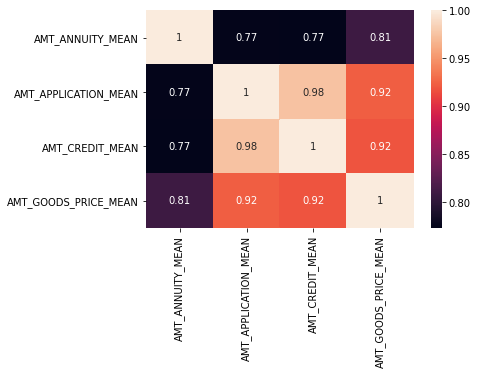

In [55]:
columns_numeric_1 = ['AMT_ANNUITY_MEAN', 'AMT_APPLICATION_MEAN', 'AMT_CREDIT_MEAN', 'AMT_GOODS_PRICE_MEAN']

columns_numeric_2 = ['AMT_ANNUITY_SUM', 'AMT_APPLICATION_SUM', 'AMT_CREDIT_SUM', 'AMT_GOODS_PRICE_SUM']

columns_numeric_3 = ['RATE_DOWN_PAYMENT_MEAN', 'RATE_INTEREST_PRIMARY_MEAN', 'RATE_INTEREST_PRIVILEGED_MEAN']

df_corr_1 = previous_application_summary[columns_numeric_1].corr()
sns.heatmap(df_corr_1, annot=True)
plt.show()

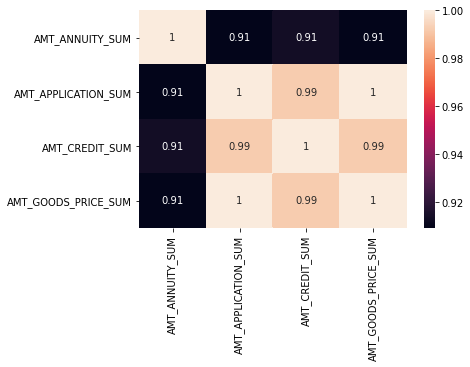

In [56]:
df_corr_2 = previous_application_summary[columns_numeric_2].corr()
sns.heatmap(df_corr_2, annot=True)
plt.show()

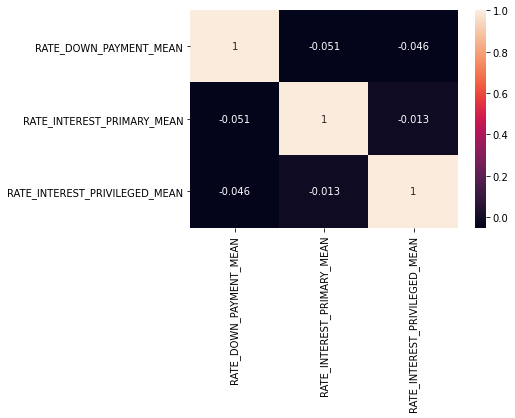

In [57]:
df_corr_3 = previous_application_summary[columns_numeric_3].corr()
sns.heatmap(df_corr_3, annot=True)
plt.show()

Because these numerical variables has high correlation, we could reduce it using PCA (if there's no missing data)

In [58]:
subset = previous_application_summary[columns_numeric_1]
try:
  pca_result = pca_2.fit_transform(subset)
except ValueError as ve:
  print("Error due to", ve)
else:
  display(pca_2.explained_variance_ratio_.sum())

Error due to Input contains NaN, infinity or a value too large for dtype('float64').


In [59]:
subset = previous_application_summary[columns_numeric_2]
try:
  pca_result = pca_2.fit_transform(subset)
except ValueError as ve:
  print("Error due to", ve)
else:
  display(pca_2.explained_variance_ratio_.sum())
  pca_df = pd.DataFrame(pca_result, columns = ['AMT_SUM_PC_1', 'AMT_SUM_PC_2'],
             index=previous_application_summary.index)
  previous_application_summary.drop(columns=columns_numeric_2, inplace=True)
  previous_application_summary = previous_application_summary.merge(pca_df, left_index=True, right_index=True)

0.9998279248373869

In [60]:
subset = previous_application_summary[columns_numeric_3]
try:
  pca_result = pca_2.fit_transform(subset)
except ValueError as ve:
  print("Error due to", ve)
else:
  display(pca_2.explained_variance_ratio_.sum())

Error due to Input contains NaN, infinity or a value too large for dtype('float64').


In [61]:
previous_application_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 100001 to 456255
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AMT_ANNUITY_MEAN               338377 non-null  float64
 1   AMT_APPLICATION_MEAN           338857 non-null  float64
 2   AMT_CREDIT_MEAN                338857 non-null  float64
 3   AMT_DOWN_PAYMENT_MEAN          318753 non-null  float64
 4   AMT_DOWN_PAYMENT_SUM           338857 non-null  float64
 5   AMT_GOODS_PRICE_MEAN           337793 non-null  float64
 6   RATE_DOWN_PAYMENT_MEAN         318753 non-null  float64
 7   RATE_DOWN_PAYMENT_SUM          338857 non-null  float64
 8   RATE_INTEREST_PRIMARY_MEAN     5721 non-null    float64
 9   RATE_INTEREST_PRIMARY_SUM      338857 non-null  float64
 10  RATE_INTEREST_PRIVILEGED_MEAN  5721 non-null    float64
 11  RATE_INTEREST_PRIVILEGED_SUM   338857 non-null  float64
 12  NAME_CONTRACT_PC_1       

## Bureau Merged DF

In [62]:
bureau_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134542 entries, 262151 to 262140
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   CREDIT_ACTIVE_ACTIVE                                      134542 non-null  float64
 1   CREDIT_ACTIVE_BAD DEBT                                    134542 non-null  float64
 2   CREDIT_ACTIVE_CLOSED                                      134542 non-null  float64
 3   CREDIT_ACTIVE_SOLD                                        134542 non-null  float64
 4   CREDIT_CURRENCY_CURRENCY 1                                134542 non-null  float64
 5   CREDIT_CURRENCY_CURRENCY 2                                134542 non-null  float64
 6   CREDIT_CURRENCY_CURRENCY 3                                134542 non-null  float64
 7   CREDIT_CURRENCY_CURRENCY 4                                134542 non-null  float64
 8  

In [63]:
bureau_summary.columns

Index(['CREDIT_ACTIVE_ACTIVE', 'CREDIT_ACTIVE_BAD DEBT',
       'CREDIT_ACTIVE_CLOSED', 'CREDIT_ACTIVE_SOLD',
       'CREDIT_CURRENCY_CURRENCY 1', 'CREDIT_CURRENCY_CURRENCY 2',
       'CREDIT_CURRENCY_CURRENCY 3', 'CREDIT_CURRENCY_CURRENCY 4',
       'CREDIT_TYPE_ANOTHER TYPE OF LOAN', 'CREDIT_TYPE_CAR LOAN',
       'CREDIT_TYPE_CASH LOAN (NON-EARMARKED)', 'CREDIT_TYPE_CONSUMER CREDIT',
       'CREDIT_TYPE_CREDIT CARD', 'CREDIT_TYPE_LOAN FOR BUSINESS DEVELOPMENT',
       'CREDIT_TYPE_LOAN FOR PURCHASE OF SHARES (MARGIN LENDING)',
       'CREDIT_TYPE_LOAN FOR THE PURCHASE OF EQUIPMENT',
       'CREDIT_TYPE_LOAN FOR WORKING CAPITAL REPLENISHMENT',
       'CREDIT_TYPE_MICROLOAN', 'CREDIT_TYPE_MOBILE OPERATOR LOAN',
       'CREDIT_TYPE_MORTGAGE', 'CREDIT_TYPE_REAL ESTATE LOAN',
       'CREDIT_TYPE_UNKNOWN TYPE OF LOAN', 'STATUS_0', 'STATUS_1', 'STATUS_2',
       'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X',
       'AMT_ANNUITY_SUM', 'AMT_CREDIT_MAX_OVERDUE_SUM', 'AMT_CREDIT_S

In [64]:
columns_chosen = ['CREDIT_ACTIVE_ACTIVE', 'CREDIT_ACTIVE_BAD DEBT', 'CREDIT_ACTIVE_CLOSED', 'CREDIT_ACTIVE_SOLD']
display(columns_chosen)

subset = bureau_summary[columns_chosen]
pca_result = pca_2.fit_transform(subset)

display(pca_2.explained_variance_ratio_.sum())

['CREDIT_ACTIVE_ACTIVE',
 'CREDIT_ACTIVE_BAD DEBT',
 'CREDIT_ACTIVE_CLOSED',
 'CREDIT_ACTIVE_SOLD']

0.9976825607367863

In [65]:
pca_df = pd.DataFrame(pca_result, columns = ['CREDIT_ACTIVE_PC_1', 'CREDIT_ACTIVE_PC_2'],
             index=bureau_summary.index)
bureau_summary.drop(columns=columns_chosen, inplace=True)
bureau_summary = bureau_summary.merge(pca_df, left_index=True, right_index=True)

In [66]:
columns_chosen = ['CREDIT_CURRENCY_CURRENCY 1', 'CREDIT_CURRENCY_CURRENCY 2', 'CREDIT_CURRENCY_CURRENCY 3',
                  'CREDIT_CURRENCY_CURRENCY 4']
display(columns_chosen)

subset = bureau_summary[columns_chosen]
pca_result = pca_2.fit_transform(subset)

display(pca_2.explained_variance_ratio_.sum())

['CREDIT_CURRENCY_CURRENCY 1',
 'CREDIT_CURRENCY_CURRENCY 2',
 'CREDIT_CURRENCY_CURRENCY 3',
 'CREDIT_CURRENCY_CURRENCY 4']

0.9999404001654106

In [67]:
pca_df = pd.DataFrame(pca_result, columns = ['CREDIT_CURRENCY_PC_1', 'CREDIT_CURRENCY_PC_2'],
             index=bureau_summary.index)
bureau_summary.drop(columns=columns_chosen, inplace=True)
bureau_summary = bureau_summary.merge(pca_df, left_index=True, right_index=True)

In [68]:
columns_chosen = ['CREDIT_TYPE_ANOTHER TYPE OF LOAN', 'CREDIT_TYPE_CAR LOAN', 'CREDIT_TYPE_CASH LOAN (NON-EARMARKED)',
                  'CREDIT_TYPE_CONSUMER CREDIT', 'CREDIT_TYPE_CREDIT CARD', 'CREDIT_TYPE_LOAN FOR BUSINESS DEVELOPMENT',
                  'CREDIT_TYPE_LOAN FOR PURCHASE OF SHARES (MARGIN LENDING)', 
                  'CREDIT_TYPE_LOAN FOR THE PURCHASE OF EQUIPMENT', 'CREDIT_TYPE_LOAN FOR WORKING CAPITAL REPLENISHMENT',
                  'CREDIT_TYPE_MICROLOAN', 'CREDIT_TYPE_MOBILE OPERATOR LOAN', 'CREDIT_TYPE_MORTGAGE',
                  'CREDIT_TYPE_REAL ESTATE LOAN', 'CREDIT_TYPE_UNKNOWN TYPE OF LOAN']
display(columns_chosen)

subset = bureau_summary[columns_chosen]
pca_result = pca_2.fit_transform(subset)

display(pca_2.explained_variance_ratio_.sum())

['CREDIT_TYPE_ANOTHER TYPE OF LOAN',
 'CREDIT_TYPE_CAR LOAN',
 'CREDIT_TYPE_CASH LOAN (NON-EARMARKED)',
 'CREDIT_TYPE_CONSUMER CREDIT',
 'CREDIT_TYPE_CREDIT CARD',
 'CREDIT_TYPE_LOAN FOR BUSINESS DEVELOPMENT',
 'CREDIT_TYPE_LOAN FOR PURCHASE OF SHARES (MARGIN LENDING)',
 'CREDIT_TYPE_LOAN FOR THE PURCHASE OF EQUIPMENT',
 'CREDIT_TYPE_LOAN FOR WORKING CAPITAL REPLENISHMENT',
 'CREDIT_TYPE_MICROLOAN',
 'CREDIT_TYPE_MOBILE OPERATOR LOAN',
 'CREDIT_TYPE_MORTGAGE',
 'CREDIT_TYPE_REAL ESTATE LOAN',
 'CREDIT_TYPE_UNKNOWN TYPE OF LOAN']

0.9823374994991699

In [69]:
pca_df = pd.DataFrame(pca_result, columns = ['CREDIT_TYPE_PC_1', 'CREDIT_TYPE_PC_2'],
             index=bureau_summary.index)
bureau_summary.drop(columns=columns_chosen, inplace=True)
bureau_summary = bureau_summary.merge(pca_df, left_index=True, right_index=True)

In [70]:
columns_chosen = ['STATUS_0', 'STATUS_1', 'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X']
display(columns_chosen)

subset = bureau_summary[columns_chosen]
pca_result = pca_3.fit_transform(subset)

display(pca_3.explained_variance_ratio_.sum())

['STATUS_0',
 'STATUS_1',
 'STATUS_2',
 'STATUS_3',
 'STATUS_4',
 'STATUS_5',
 'STATUS_C',
 'STATUS_X']

0.9977283460760066

In [71]:
pca_df = pd.DataFrame(pca_result, columns = ['CREDIT_STATUS_PC_1', 'CREDIT_STATUS_PC_2', 'CREDIT_STATUS_PC_3'],
             index=bureau_summary.index)
bureau_summary.drop(columns=columns_chosen, inplace=True)
bureau_summary = bureau_summary.merge(pca_df, left_index=True, right_index=True)

In [72]:
bureau_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134542 entries, 262151 to 262140
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_ANNUITY_SUM             134542 non-null  float64
 1   AMT_CREDIT_MAX_OVERDUE_SUM  134542 non-null  float64
 2   AMT_CREDIT_SUM_SUM          134542 non-null  float64
 3   AMT_CREDIT_SUM_DEBT_SUM     134542 non-null  float64
 4   AMT_CREDIT_SUM_LIMIT_SUM    134542 non-null  float64
 5   AMT_CREDIT_SUM_OVERDUE_SUM  134542 non-null  float64
 6   CNT_CREDIT_PROLONG_SUM      134542 non-null  int64  
 7   CREDIT_DAY_OVERDUE_SUM      134542 non-null  int64  
 8   DAYS_CREDIT_SUM             134542 non-null  int64  
 9   DAYS_CREDIT_ENDDATE_SUM     134542 non-null  float64
 10  DAYS_CREDIT_UPDATE_SUM      134542 non-null  int64  
 11  DAYS_ENDDATE_FACT_SUM       134542 non-null  float64
 12  MONTHS_BALANCE_SUM          134542 non-null  int64  
 13  CREDIT_AC

## Application DF

In [73]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [74]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   48744 non-null  int64   
 1   NAME_CONTRACT_TYPE           48744 non-null  category
 2   CODE_GENDER                  48744 non-null  category
 3   FLAG_OWN_CAR                 48744 non-null  category
 4   FLAG_OWN_REALTY              48744 non-null  category
 5   CNT_CHILDREN                 48744 non-null  int64   
 6   AMT_INCOME_TOTAL             48744 non-null  float64 
 7   AMT_CREDIT                   48744 non-null  float64 
 8   AMT_ANNUITY                  48744 non-null  float64 
 9   AMT_GOODS_PRICE              48744 non-null  float64 
 10  NAME_INCOME_TYPE             48744 non-null  category
 11  NAME_EDUCATION_TYPE          48744 non-null  category
 12  NAME_FAMILY_STATUS           48744 non-null  category
 13  N

We will reduce the flag document and amount of requested credit features using PCA

In [75]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6'

In [76]:
pca_5=PCA(n_components=5)

In [77]:
columns_1 = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
             'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
             'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
             'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

subset_train = application_train[columns_1]
subset_test = application_test[columns_1]

pca_result_train = pca_5.fit_transform(subset_train)
pca_result_test = pca_5.transform(subset_test)

display(pca_5.explained_variance_ratio_.sum())

0.9387277454776588

In [78]:
pca_train_df = pd.DataFrame(pca_result_train, columns = ['FLAG_DOCUMENT_PC_1', 'FLAG_DOCUMENT_PC_2', 'FLAG_DOCUMENT_PC_3',
                            'FLAG_DOCUMENT_PC_4', 'FLAG_DOCUMENT_PC_5'], index=application_train.index)

pca_test_df = pd.DataFrame(pca_result_test, columns = ['FLAG_DOCUMENT_PC_1', 'FLAG_DOCUMENT_PC_2', 'FLAG_DOCUMENT_PC_3',
                           'FLAG_DOCUMENT_PC_4', 'FLAG_DOCUMENT_PC_5'], index=application_test.index)

application_train.drop(columns=columns_1, inplace=True)
application_train = application_train.merge(pca_train_df, left_index=True, right_index=True)

application_test.drop(columns=columns_1, inplace=True)
application_test = application_test.merge(pca_test_df, left_index=True, right_index=True)

In [79]:
columns_2 = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
             'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

subset_train = application_train[columns_2]
subset_test = application_test[columns_2]

pca_result_train = pca_2.fit_transform(subset_train)
pca_result_test = pca_2.transform(subset_test)

display(pca_2.explained_variance_ratio_.sum())

0.9998481294534928

In [80]:
pca_train_df = pd.DataFrame(pca_result_train, columns = ['AMT_REQ_CREDIT_PC_1', 'AMT_REQ_CREDIT_PC_2'],
                            index=application_train.index)

pca_test_df = pd.DataFrame(pca_result_test, columns = ['AMT_REQ_CREDIT_PC_1', 'AMT_REQ_CREDIT_PC_2'],
                            index=application_test.index)

application_train.drop(columns=columns_2, inplace=True)
application_train = application_train.merge(pca_train_df, left_index=True, right_index=True)

application_test.drop(columns=columns_2, inplace=True)
application_test = application_test.merge(pca_test_df, left_index=True, right_index=True)

In [81]:
application_train.set_index(application_train['SK_ID_CURR'], drop=False, inplace=True)
application_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non

In [82]:
application_test.set_index(application_test['SK_ID_CURR'], drop=False, inplace=True)
application_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   48744 non-null  int64   
 1   NAME_CONTRACT_TYPE           48744 non-null  category
 2   CODE_GENDER                  48744 non-null  category
 3   FLAG_OWN_CAR                 48744 non-null  category
 4   FLAG_OWN_REALTY              48744 non-null  category
 5   CNT_CHILDREN                 48744 non-null  int64   
 6   AMT_INCOME_TOTAL             48744 non-null  float64 
 7   AMT_CREDIT                   48744 non-null  float64 
 8   AMT_ANNUITY                  48744 non-null  float64 
 9   AMT_GOODS_PRICE              48744 non-null  float64 
 10  NAME_INCOME_TYPE             48744 non-null  category
 11  NAME_EDUCATION_TYPE          48744 non-null  category
 12  NAME_FAMILY_STATUS           48744 non-null  category


In [83]:
application_train = application_train.merge(previous_application_summary, how = 'left', left_index=True, right_index=True)

null_columns_train=application_train.columns[application_train.isnull().any()]
print("Count of Null Entries in Train Columns: ")
display(application_train[null_columns_train].isnull().sum())

application_test = application_test.merge(previous_application_summary, how = 'left', left_index=True, right_index=True)

null_columns_test=application_test.columns[application_test.isnull().any()]
print("Count of Null Entries in Test Columns: ")
display(application_test[null_columns_test].isnull().sum())

Count of Null Entries in Train Columns: 


AMT_ANNUITY_MEAN                  16871
AMT_APPLICATION_MEAN              16454
AMT_CREDIT_MEAN                   16454
AMT_DOWN_PAYMENT_MEAN             33906
AMT_DOWN_PAYMENT_SUM              16454
AMT_GOODS_PRICE_MEAN              17429
RATE_DOWN_PAYMENT_MEAN            33906
RATE_DOWN_PAYMENT_SUM             16454
RATE_INTEREST_PRIMARY_MEAN       302902
RATE_INTEREST_PRIMARY_SUM         16454
RATE_INTEREST_PRIVILEGED_MEAN    302902
RATE_INTEREST_PRIVILEGED_SUM      16454
NAME_CONTRACT_PC_1                16454
NAME_CONTRACT_PC_2                16454
NAME_CONTRACT_PC_3                16454
CODE_REJECT_REASON_PC_1           16454
CODE_REJECT_REASON_PC_2           16454
NAME_CLIENT_TYPE_PC_1             16454
NAME_CLIENT_TYPE_PC_2             16454
NAME_PORTFOLIO_PC_1               16454
NAME_PORTFOLIO_PC_2               16454
NAME_PORTFOLIO_PC_3               16454
NAME_PRODUCT_TYPE_PC_1            16454
NAME_PRODUCT_TYPE_PC_2            16454
AMT_SUM_PC_1                      16454


Count of Null Entries in Test Columns: 


AMT_ANNUITY_MEAN                  1007
AMT_APPLICATION_MEAN               944
AMT_CREDIT_MEAN                    944
AMT_DOWN_PAYMENT_MEAN             3596
AMT_DOWN_PAYMENT_SUM               944
AMT_GOODS_PRICE_MEAN              1033
RATE_DOWN_PAYMENT_MEAN            3596
RATE_DOWN_PAYMENT_SUM              944
RATE_INTEREST_PRIMARY_MEAN       47632
RATE_INTEREST_PRIMARY_SUM          944
RATE_INTEREST_PRIVILEGED_MEAN    47632
RATE_INTEREST_PRIVILEGED_SUM       944
NAME_CONTRACT_PC_1                 944
NAME_CONTRACT_PC_2                 944
NAME_CONTRACT_PC_3                 944
CODE_REJECT_REASON_PC_1            944
CODE_REJECT_REASON_PC_2            944
NAME_CLIENT_TYPE_PC_1              944
NAME_CLIENT_TYPE_PC_2              944
NAME_PORTFOLIO_PC_1                944
NAME_PORTFOLIO_PC_2                944
NAME_PORTFOLIO_PC_3                944
NAME_PRODUCT_TYPE_PC_1             944
NAME_PRODUCT_TYPE_PC_2             944
AMT_SUM_PC_1                       944
AMT_SUM_PC_2             

In [84]:
for col in null_columns_train:
  print("Column Name: ", col, " Minimum Number: ", application_train[col].min())
  application_train[col].fillna(-999, inplace=True)

print(" ")
for col in null_columns_test:
  print("Column Name: ", col, " Minimum Number: ", application_test[col].min())
  application_test[col].fillna(-999, inplace=True)

Column Name:  AMT_ANNUITY_MEAN  Minimum Number:  0.0
Column Name:  AMT_APPLICATION_MEAN  Minimum Number:  0.0
Column Name:  AMT_CREDIT_MEAN  Minimum Number:  0.0
Column Name:  AMT_DOWN_PAYMENT_MEAN  Minimum Number:  -0.225
Column Name:  AMT_DOWN_PAYMENT_SUM  Minimum Number:  -0.45
Column Name:  AMT_GOODS_PRICE_MEAN  Minimum Number:  0.0
Column Name:  RATE_DOWN_PAYMENT_MEAN  Minimum Number:  -7.489381707153923e-06
Column Name:  RATE_DOWN_PAYMENT_SUM  Minimum Number:  -1.4978763414307847e-05
Column Name:  RATE_INTEREST_PRIMARY_MEAN  Minimum Number:  0.03478125354187918
Column Name:  RATE_INTEREST_PRIMARY_SUM  Minimum Number:  0.0
Column Name:  RATE_INTEREST_PRIVILEGED_MEAN  Minimum Number:  0.3731501057082452
Column Name:  RATE_INTEREST_PRIVILEGED_SUM  Minimum Number:  0.0
Column Name:  NAME_CONTRACT_PC_1  Minimum Number:  -3.617067132205319
Column Name:  NAME_CONTRACT_PC_2  Minimum Number:  -28.92494426114426
Column Name:  NAME_CONTRACT_PC_3  Minimum Number:  -16.69308578691104
Column N

In [85]:
application_train = application_train.merge(installments_payment_summary, how = 'left', left_index=True, right_index=True)

null_columns_train=application_train.columns[application_train.isnull().any()]
print("Count of Null Entries in Train Columns: ")
display(application_train[null_columns_train].isnull().sum())

application_test = application_test.merge(installments_payment_summary, how = 'left', left_index=True, right_index=True)

null_columns_test=application_test.columns[application_test.isnull().any()]
print("Count of Null Entries in Test Columns: ")
display(application_test[null_columns_test].isnull().sum())

Count of Null Entries in Train Columns: 


LATE_DAYS_MEAN     15868
LATE_DAYS_SUM      15868
LATE_DAYS_MAX      15868
AMT_UNPAID_MEAN    15868
AMT_UNPAID_SUM     15868
AMT_UNPAID_MAX     15868
dtype: int64

Count of Null Entries in Test Columns: 


LATE_DAYS_MEAN     800
LATE_DAYS_SUM      800
LATE_DAYS_MAX      800
AMT_UNPAID_MEAN    800
AMT_UNPAID_SUM     800
AMT_UNPAID_MAX     800
dtype: int64

In [86]:
application_train = application_train.merge(bureau_summary, how = 'left', left_index=True, right_index=True)

null_columns_train=application_train.columns[application_train.isnull().any()]
print("Count of Null Entries in Train Columns: ")
display(application_train[null_columns_train].isnull().sum())

application_test = application_test.merge(bureau_summary, how = 'left', left_index=True, right_index=True)

null_columns_test=application_test.columns[application_test.isnull().any()]
print("Count of Null Entries in Test Columns: ")
display(application_test[null_columns_test].isnull().sum())

Count of Null Entries in Train Columns: 


LATE_DAYS_MEAN                 15868
LATE_DAYS_SUM                  15868
LATE_DAYS_MAX                  15868
AMT_UNPAID_MEAN                15868
AMT_UNPAID_SUM                 15868
AMT_UNPAID_MAX                 15868
AMT_ANNUITY_SUM               215280
AMT_CREDIT_MAX_OVERDUE_SUM    215280
AMT_CREDIT_SUM_SUM            215280
AMT_CREDIT_SUM_DEBT_SUM       215280
AMT_CREDIT_SUM_LIMIT_SUM      215280
AMT_CREDIT_SUM_OVERDUE_SUM    215280
CNT_CREDIT_PROLONG_SUM        215280
CREDIT_DAY_OVERDUE_SUM        215280
DAYS_CREDIT_SUM               215280
DAYS_CREDIT_ENDDATE_SUM       215280
DAYS_CREDIT_UPDATE_SUM        215280
DAYS_ENDDATE_FACT_SUM         215280
MONTHS_BALANCE_SUM            215280
CREDIT_ACTIVE_PC_1            215280
CREDIT_ACTIVE_PC_2            215280
CREDIT_CURRENCY_PC_1          215280
CREDIT_CURRENCY_PC_2          215280
CREDIT_TYPE_PC_1              215280
CREDIT_TYPE_PC_2              215280
CREDIT_STATUS_PC_1            215280
CREDIT_STATUS_PC_2            215280
C

Count of Null Entries in Test Columns: 


LATE_DAYS_MEAN                 800
LATE_DAYS_SUM                  800
LATE_DAYS_MAX                  800
AMT_UNPAID_MEAN                800
AMT_UNPAID_SUM                 800
AMT_UNPAID_MAX                 800
AMT_ANNUITY_SUM               6433
AMT_CREDIT_MAX_OVERDUE_SUM    6433
AMT_CREDIT_SUM_SUM            6433
AMT_CREDIT_SUM_DEBT_SUM       6433
AMT_CREDIT_SUM_LIMIT_SUM      6433
AMT_CREDIT_SUM_OVERDUE_SUM    6433
CNT_CREDIT_PROLONG_SUM        6433
CREDIT_DAY_OVERDUE_SUM        6433
DAYS_CREDIT_SUM               6433
DAYS_CREDIT_ENDDATE_SUM       6433
DAYS_CREDIT_UPDATE_SUM        6433
DAYS_ENDDATE_FACT_SUM         6433
MONTHS_BALANCE_SUM            6433
CREDIT_ACTIVE_PC_1            6433
CREDIT_ACTIVE_PC_2            6433
CREDIT_CURRENCY_PC_1          6433
CREDIT_CURRENCY_PC_2          6433
CREDIT_TYPE_PC_1              6433
CREDIT_TYPE_PC_2              6433
CREDIT_STATUS_PC_1            6433
CREDIT_STATUS_PC_2            6433
CREDIT_STATUS_PC_3            6433
dtype: int64

In [87]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 100 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   SK_ID_CURR                     307511 non-null  int64   
 1   TARGET                         307511 non-null  int64   
 2   NAME_CONTRACT_TYPE             307511 non-null  category
 3   CODE_GENDER                    307511 non-null  category
 4   FLAG_OWN_CAR                   307511 non-null  category
 5   FLAG_OWN_REALTY                307511 non-null  category
 6   CNT_CHILDREN                   307511 non-null  int64   
 7   AMT_INCOME_TOTAL               307511 non-null  float64 
 8   AMT_CREDIT                     307511 non-null  float64 
 9   AMT_ANNUITY                    307511 non-null  float64 
 10  AMT_GOODS_PRICE                307511 non-null  float64 
 11  NAME_INCOME_TYPE               307511 non-null  category
 12  NAME_EDUCA

In [88]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   SK_ID_CURR                     48744 non-null  int64   
 1   NAME_CONTRACT_TYPE             48744 non-null  category
 2   CODE_GENDER                    48744 non-null  category
 3   FLAG_OWN_CAR                   48744 non-null  category
 4   FLAG_OWN_REALTY                48744 non-null  category
 5   CNT_CHILDREN                   48744 non-null  int64   
 6   AMT_INCOME_TOTAL               48744 non-null  float64 
 7   AMT_CREDIT                     48744 non-null  float64 
 8   AMT_ANNUITY                    48744 non-null  float64 
 9   AMT_GOODS_PRICE                48744 non-null  float64 
 10  NAME_INCOME_TYPE               48744 non-null  category
 11  NAME_EDUCATION_TYPE            48744 non-null  category
 12  NAME_FAMILY_STATUS        

In [89]:
np.setdiff1d(application_train.columns, application_test.columns)

array(['TARGET'], dtype=object)

## Checking Data Leakage and Doing Filter Feature Selection Method

In [90]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

!pip install ppscore
import ppscore

Check Data Leakage using Predictive Power Score Matrix

In [91]:
df_ppscore = ppscore.matrix(application_train.drop(columns=['TARGET', 'SK_ID_CURR']))

In [92]:
df_ppscore_filtered = df_ppscore[df_ppscore['case']!='predict_itself']
df_ppscore_leakage_indication = df_ppscore_filtered[df_ppscore_filtered['ppscore']>0.7]

In [93]:
df_ppscore_leakage_indication.sort_values(by='ppscore',ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
899,NAME_INCOME_TYPE,FLAG_EMP_PHONE,1.000000,regression,True,mean absolute error,0.177800,0.000000,DecisionTreeRegressor()
3055,ORGANIZATION_TYPE,FLAG_EMP_PHONE,1.000000,regression,True,mean absolute error,0.177800,0.000000,DecisionTreeRegressor()
1472,OWN_CAR_AGE,FLAG_OWN_CAR,1.000000,classification,True,weighted F1,0.552400,1.000000,DecisionTreeClassifier()
1389,DAYS_EMPLOYED,FLAG_EMP_PHONE,1.000000,regression,True,mean absolute error,0.177800,0.000000,DecisionTreeRegressor()
3957,FLAG_DOCUMENT_PC_4,FLAG_DOCUMENT_PC_1,0.999997,regression,True,mean absolute error,0.313245,0.000001,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
9105,CREDIT_CURRENCY_PC_2,CREDIT_ACTIVE_PC_1,0.731417,regression,True,mean absolute error,91.439603,24.559105,DecisionTreeRegressor()
8813,CREDIT_ACTIVE_PC_1,CREDIT_CURRENCY_PC_1,0.722301,regression,True,mean absolute error,107.740372,29.919352,DecisionTreeRegressor()
9011,CREDIT_CURRENCY_PC_1,CREDIT_TYPE_PC_1,0.715644,regression,True,mean absolute error,88.128745,25.059909,DecisionTreeRegressor()
9109,CREDIT_CURRENCY_PC_2,CREDIT_TYPE_PC_1,0.712831,regression,True,mean absolute error,88.128745,25.307855,DecisionTreeRegressor()


Based on this result, we have several indications of Data Leakage (one feature affects another features), but for now we could leave it as it is

Then, we will filter out top 40 features using Predictive Power Score

In [94]:
application_train['TARGET'] = pd.Categorical(application_train['TARGET'], categories = set(application_train['TARGET']))
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [95]:
result=ppscore.predictors(application_train.drop(columns=['SK_ID_CURR']), "TARGET").sort_values(by='ppscore', ascending=False)

Since the PPS value doesn't show any significant values (it means no single category has great impact on target variable without interactions with other variables), we will leave it as it is

In [96]:
# result['baseline_model_difference'] = result['model_score'] - result['baseline_score']
# result.sort_values(by='baseline_model_difference', ascending=False)

In [97]:
for categoricals in application_test.select_dtypes(['category']).columns:
  application_train[categoricals]=application_train[categoricals].cat.codes
  application_test[categoricals]=application_test[categoricals].cat.codes

application_train['TARGET'] = application_train['TARGET'].cat.codes
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [98]:
#Filling the NA by -999 (so it's implicitly stated that it is NA)
application_train.fillna(-999, inplace=True)
application_test.fillna(-999, inplace=True)

In [99]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 100 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   SK_ID_CURR                     307511 non-null  int64  
 1   TARGET                         307511 non-null  int8   
 2   NAME_CONTRACT_TYPE             307511 non-null  int8   
 3   CODE_GENDER                    307511 non-null  int8   
 4   FLAG_OWN_CAR                   307511 non-null  int8   
 5   FLAG_OWN_REALTY                307511 non-null  int8   
 6   CNT_CHILDREN                   307511 non-null  int64  
 7   AMT_INCOME_TOTAL               307511 non-null  float64
 8   AMT_CREDIT                     307511 non-null  float64
 9   AMT_ANNUITY                    307511 non-null  float64
 10  AMT_GOODS_PRICE                307511 non-null  float64
 11  NAME_INCOME_TYPE               307511 non-null  int8   
 12  NAME_EDUCATION_TYPE     

In [100]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SK_ID_CURR                     48744 non-null  int64  
 1   NAME_CONTRACT_TYPE             48744 non-null  int8   
 2   CODE_GENDER                    48744 non-null  int8   
 3   FLAG_OWN_CAR                   48744 non-null  int8   
 4   FLAG_OWN_REALTY                48744 non-null  int8   
 5   CNT_CHILDREN                   48744 non-null  int64  
 6   AMT_INCOME_TOTAL               48744 non-null  float64
 7   AMT_CREDIT                     48744 non-null  float64
 8   AMT_ANNUITY                    48744 non-null  float64
 9   AMT_GOODS_PRICE                48744 non-null  float64
 10  NAME_INCOME_TYPE               48744 non-null  int8   
 11  NAME_EDUCATION_TYPE            48744 non-null  int8   
 12  NAME_FAMILY_STATUS             48744 non

# Model Tuning

In [101]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import RidgeClassifierCV
from xgboost import XGBRegressor,plot_importance
from xgboost import XGBClassifier
from operator import itemgetter

In [102]:
X_train, X_val, y_train, y_val = train_test_split(application_train.drop(['TARGET','SK_ID_CURR'], axis=1),
                                                    application_train['TARGET'], 
                                                    test_size=0.2, random_state = 100)

print('Number of Train Data is: ', X_train.shape[0])
print('Number of Val Data is: ', X_val.shape[0])

X_train.head(2)
X_val.head(2)

Number of Train Data is:  246008
Number of Val Data is:  61503


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_PC_1,FLAG_DOCUMENT_PC_2,FLAG_DOCUMENT_PC_3,FLAG_DOCUMENT_PC_4,FLAG_DOCUMENT_PC_5,AMT_REQ_CREDIT_PC_1,AMT_REQ_CREDIT_PC_2,AMT_ANNUITY_MEAN,AMT_APPLICATION_MEAN,AMT_CREDIT_MEAN,AMT_DOWN_PAYMENT_MEAN,AMT_DOWN_PAYMENT_SUM,AMT_GOODS_PRICE_MEAN,RATE_DOWN_PAYMENT_MEAN,RATE_DOWN_PAYMENT_SUM,RATE_INTEREST_PRIMARY_MEAN,RATE_INTEREST_PRIMARY_SUM,RATE_INTEREST_PRIVILEGED_MEAN,RATE_INTEREST_PRIVILEGED_SUM,NAME_CONTRACT_PC_1,NAME_CONTRACT_PC_2,NAME_CONTRACT_PC_3,CODE_REJECT_REASON_PC_1,CODE_REJECT_REASON_PC_2,NAME_CLIENT_TYPE_PC_1,NAME_CLIENT_TYPE_PC_2,NAME_PORTFOLIO_PC_1,NAME_PORTFOLIO_PC_2,NAME_PORTFOLIO_PC_3,NAME_PRODUCT_TYPE_PC_1,NAME_PRODUCT_TYPE_PC_2,AMT_SUM_PC_1,AMT_SUM_PC_2,LATE_DAYS_MEAN,LATE_DAYS_SUM,LATE_DAYS_MAX,AMT_UNPAID_MEAN,AMT_UNPAID_SUM,AMT_UNPAID_MAX,AMT_ANNUITY_SUM,AMT_CREDIT_MAX_OVERDUE_SUM,AMT_CREDIT_SUM_SUM,AMT_CREDIT_SUM_DEBT_SUM,AMT_CREDIT_SUM_LIMIT_SUM,AMT_CREDIT_SUM_OVERDUE_SUM,CNT_CREDIT_PROLONG_SUM,CREDIT_DAY_OVERDUE_SUM,DAYS_CREDIT_SUM,DAYS_CREDIT_ENDDATE_SUM,DAYS_CREDIT_UPDATE_SUM,DAYS_ENDDATE_FACT_SUM,MONTHS_BALANCE_SUM,CREDIT_ACTIVE_PC_1,CREDIT_ACTIVE_PC_2,CREDIT_CURRENCY_PC_1,CREDIT_CURRENCY_PC_2,CREDIT_TYPE_PC_1,CREDIT_TYPE_PC_2,CREDIT_STATUS_PC_1,CREDIT_STATUS_PC_2,CREDIT_STATUS_PC_3
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
281498,0,2,0,0,0,63000.0,314055.0,16573.5,238500.0,3,2,1,4,-14126,-151,-99.0,1,1,1,1,1,0,10,1.0,2,0,0,0,0,0,0,27,1.0,0.0,1.0,0.0,-569.0,-0.313593,-0.004004,-0.017349,0.003071,-0.011815,-32.269213,0.704069,5630.220,28755.0,30271.5,0.0,0.0,28755.0,0.0,0.0,-999.0,0.0,-999.0,0.0,-3.265881,-1.244843,0.254810,-3.041173,0.104680,-3.628521,-0.454297,-1.858450,-0.894073,0.144240,-2.543343,-0.281701,-1.507992e+06,-12869.018818,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
423537,0,1,1,1,0,166500.0,1288350.0,41562.0,1125000.0,7,1,4,4,-15322,-2437,3.0,1,1,1,1,0,1,9,2.0,2,0,0,0,0,0,0,23,2.0,0.0,2.0,0.0,-837.0,-0.313593,-0.004004,-0.017349,0.003071,-0.011815,-34.327923,-1.607304,53135.805,562500.0,587947.5,-999.0,0.0,750000.0,-999.0,0.0,-999.0,0.0,-999.0,0.0,0.828401,-2.708947,-0.207291,-0.879663,0.668199,-0.629351,-0.421593,1.038503,-2.337277,-0.548603,-1.920513,0.726522,2.399546e+06,-111901.450430,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_PC_1,FLAG_DOCUMENT_PC_2,FLAG_DOCUMENT_PC_3,FLAG_DOCUMENT_PC_4,FLAG_DOCUMENT_PC_5,AMT_REQ_CREDIT_PC_1,AMT_REQ_CREDIT_PC_2,AMT_ANNUITY_MEAN,AMT_APPLICATION_MEAN,AMT_CREDIT_MEAN,AMT_DOWN_PAYMENT_MEAN,AMT_DOWN_PAYMENT_SUM,AMT_GOODS_PRICE_MEAN,RATE_DOWN_PAYMENT_MEAN,RATE_DOWN_PAYMENT_SUM,RATE_INTEREST_PRIMARY_MEAN,RATE_INTEREST_PRIMARY_SUM,RATE_INTEREST_PRIVILEGED_MEAN,RATE_INTEREST_PRIVILEGED_SUM,NAME_CONTRACT_PC_1,NAME_CONTRACT_PC_2,NAME_CONTRACT_PC_3,CODE_REJECT_REASON_PC_1,CODE_REJECT_REASON_PC_2,NAME_CLIENT_TYPE_PC_1,NAME_CLIENT_TYPE_PC_2,NAME_PORTFOLIO_PC_1,NAME_PORTFOLIO_PC_2,NAME_PORTFOLIO_PC_3,NAME_PRODUCT_TYPE_PC_1,NAME_PRODUCT_TYPE_PC_2,AMT_SUM_PC_1,AMT_SUM_PC_2,LATE_DAYS_MEAN,LATE_DAYS_SUM,LATE_DAYS_MAX,AMT_UNPAID_MEAN,AMT_UNPAID_SUM,AMT_UNPAID_MAX,AMT_ANNUITY_SUM,AMT_CREDIT_MAX_OVERDUE_SUM,AMT_CREDIT_SUM_SUM,AMT_CREDIT_SUM_DEBT_SUM,AMT_CREDIT_SUM_LIMIT_SUM,AMT_CREDIT_SUM_OVERDUE_SUM,CNT_CREDIT_PROLONG_SUM,CREDIT_DAY_OVERDUE_SUM,DAYS_CREDIT_SUM,DAYS_CREDIT_ENDDATE_SUM,DAYS_CREDIT_UPDATE_SUM,DAYS_ENDDATE_FACT_SUM,MONTHS_BALANCE_SUM,CREDIT_ACTIVE_PC_1,CREDIT_ACTIVE_PC_2,CREDIT_CURRENCY_PC_1,CREDIT_CURRENCY_PC_2,CREDIT_TYPE_PC_1,CREDIT_TYPE_PC_2,CREDIT_STATUS_PC_1,CREDIT_STATUS_PC_2,CREDIT_STATUS_PC_3
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
362145,0,1,0,1,0,112500.0,1288350.0,37800.0,1125000.0,3,0,4,4,-16582,-909,-99.0,1,1,0,1,0,0,18,2.0,3,0,0,0,0,0,0,23,4.0,2.0,4.0,2.0,-1633.0,0.874248,0.729681,-0.240126,0.030574,-0.015869,-32.262365,1.854211,11314.3950,53712.0,50332.500,5373.0,5373.0,53712.0,0.105047,0.105047,-999.0,0.0,-999.0,0.0,-3.265881,-1.244843,0.254810,-3.041173,0.104680,-3.628521,-0.454297,-1.85845,-0.894073,0.144240,-2.543343,-0.281701,-1.467680e+06,-18626.575945,0.000000,0.0,0.0,0.000000,0.000,0.000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
350807,0,1,0,1,0,85050.0,463284.0,14674.5,382500.0,6,1,3,4,-22446,365243,-99.0,1,0,0,1,0,0,16,1.0,3,0,0,0,0,0,0,43,4.0,2.0,4.0,1.0,-805.0,0.910918,-0.683507,-0.212372,0.027939,-0.002022,210.638914,-0.032058,20424.7275,154132.5,169255.875,2745.0,5490.0,308265.0,0.024866,0.049732,-999.0,0.0,-999.0,0.0,8.553418,-1.833328,-0.610802,5.399375,1.381474,6.353616,0.631583,4.97031,0.081607,2.352498,5.122941,-0.643863,1.754986e+06,-17242.329502,0.145455,8.0,3.0,1240.348091,68219.145,35612.775,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [103]:
!pip install scikit-learn==0.24
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [117]:
from sklearn.metrics import log_loss, f1_score

In [105]:
alphas = [0.1, 0.5, 1, 2, 5]
kfold = StratifiedKFold(5)
clf_lr = RidgeClassifierCV(alphas=alphas, cv=kfold).fit(X_train, y_train)

print("Training Log-Loss score: ", log_loss(y_train, clf_lr.predict(X_train)))
print("Validation Log-Loss score: ", log_loss(y_val, clf_lr.predict(X_val)))

Training Log-Loss score: 2.785054632936337
Validation Log-Loss score: 2.806770486339871


In [118]:
print("Training F1-Score: ", f1_score(y_train, clf_lr.predict(X_train)))
print("Validation F1-Score: ", f1_score(y_val, clf_lr.predict(X_val)))

Training F1-Score:  0.0006045644616857272
Validation F1-Score:  0.0004000000000000001


In [106]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, clf_lr.predict(X_train)).ravel()
total_train = tn + fp + fn + tp
print('Train TN Amount is: ' + str(tn) + ' or ' + str(tn/total_train*100) + '%')
print('Train TP Amount is: ' + str(tp) + ' or ' + str(tp/total_train*100) + '%')
print('Train FN Amount is: ' + str(fn) + ' or ' + str(fn/total_train*100) + '%')
print('Train FP Amount is: ' + str(fp) + ' or ' + str(fp/total_train*100) + '%')

print()
tn, fp, fn, tp = confusion_matrix(y_val, clf_lr.predict(X_val)).ravel()
total_CV = tn + fp + fn + tp
print('Val TN Amount is: ' + str(tn) + ' or ' + str(tn/total_CV*100) + '%')
print('Val TP Amount is: ' + str(tp) + ' or ' + str(tp/total_CV*100) + '%')
print('Val FN Amount is: ' + str(fn) + ' or ' + str(fn/total_CV*100) + '%')
print('Val FP Amount is: ' + str(fp) + ' or ' + str(fp/total_CV*100) + '%')

Train TN Amount is: 226165 or 91.93400214627167%
Train TP Amount is: 6 or 0.002438945074956912%
Train FN Amount is: 19821 or 8.05705505512016%
Train FP Amount is: 16 or 0.006503853533218432%

Val TN Amount is: 56504 or 91.87194120612003%
Val TP Amount is: 1 or 0.0016259369461652277%
Val FN Amount is: 4997 or 8.124806919987643%
Val FP Amount is: 1 or 0.0016259369461652277%


In [107]:
from collections import OrderedDict
param_dict = OrderedDict(
    reg_lambda = [1, 2, 5],
    reg_alpha = [1, 2, 5],
    max_depth = [5, 6, 7])

In [108]:
gsearch = HalvingGridSearchCV(estimator = XGBRegressor(random_state=100, objective='binary:logistic'),
                              param_grid = param_dict, cv=kfold, n_jobs=-1, 
                              min_resources=int(np.floor(0.05*X_train.shape[0])),
                              max_resources=int(np.floor(0.5*X_train.shape[0])),
                              verbose = 2)

gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_,

n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 12300
max_resources_: 123004
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 12300
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 36900
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 110700
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                    estimator=XGBRegressor(objective='binary:logistic',
                                           random_state=100),
                    max_resources=123004, min_resources=12300, n_jobs=-1,
                    param_grid=OrderedDict([('reg_lambda', [1, 2, 5]),
                                            ('reg_alpha', [1, 2, 5]),
                                            ('max_depth', [5, 6, 7])]),
                    refit=<function _refit_callable at 0x7fdb9b7090e0>,
                    verbose=2)

({'max_depth': 5, 'reg_alpha': 5, 'reg_lambda': 2}, 0.0544339634675461)

In [109]:
print("Training Log-Loss score: ", log_loss(y_train, gsearch.predict(X_train).round().astype('int')))
print("Validation Log-Loss score: ", log_loss(y_val, gsearch.predict(X_val).round().astype('int')))

Training Log-Loss score: 2.781123524436358
Validation Log-Loss score: 2.8084553005240456


In [119]:
print("Training F1-Score: ", f1_score(y_train, gsearch.predict(X_train).round().astype('int')))
print("Validation F1-Score: ", f1_score(y_val, gsearch.predict(X_val).round().astype('int')))

Training F1-Score:  0.0036215482118605704
Validation F1-Score:  0.0015971251746855662


In [111]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_train, gsearch.predict(X_train).round().astype('int')).ravel()
total_train = tn + fp + fn + tp
print('Train TN Amount is:' + str(tn) + ' or ' + str(tn/total_train*100) + '%')
print('Train TP Amount is:' + str(tp) + ' or ' + str(tp/total_train*100) + '%')
print('Train FN Amount is:' + str(fn) + ' or ' + str(fn/total_train*100) + '%')
print('Train FP Amount is:' + str(fp) + ' or ' + str(fp/total_train*100) + '%')

tn, fp, fn, tp = confusion_matrix(y_val, gsearch.predict(X_val).round().astype('int')).ravel()
total_CV = tn + fp + fn + tp
print('Val TN Amount is:' + str(tn) + ' or ' + str(tn/total_CV*100) + '%')
print('Val TP Amount is:' + str(tp) + ' or ' + str(tp/total_CV*100) + '%')
print('Val FN Amount is:' + str(fn) + ' or ' + str(fn/total_CV*100) + '%')
print('Val FP Amount is:' + str(fp) + ' or ' + str(fp/total_CV*100) + '%')

Train TN Amount is:226163 or 91.93318916458001%
Train TP Amount is:36 or 0.014633670449741473%
Train FN Amount is:19791 or 8.044860329745374%
Train FP Amount is:18 or 0.0073168352248707364%
Val TN Amount is:56498 or 91.86218558444304%
Val TP Amount is:4 or 0.006503747784660911%
Val FN Amount is:4994 or 8.119929109149147%
Val FP Amount is:7 or 0.011381558623156594%


In [124]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 100001 to 456250
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SK_ID_CURR                     48744 non-null  int64  
 1   NAME_CONTRACT_TYPE             48744 non-null  int8   
 2   CODE_GENDER                    48744 non-null  int8   
 3   FLAG_OWN_CAR                   48744 non-null  int8   
 4   FLAG_OWN_REALTY                48744 non-null  int8   
 5   CNT_CHILDREN                   48744 non-null  int64  
 6   AMT_INCOME_TOTAL               48744 non-null  float64
 7   AMT_CREDIT                     48744 non-null  float64
 8   AMT_ANNUITY                    48744 non-null  float64
 9   AMT_GOODS_PRICE                48744 non-null  float64
 10  NAME_INCOME_TYPE               48744 non-null  int8   
 11  NAME_EDUCATION_TYPE            48744 non-null  int8   
 12  NAME_FAMILY_STATUS             48744 non

In [142]:
dict = {'SK_ID_CURR' : application_test.index, 'TARGET' : gsearch.predict(application_test.drop(columns=['SK_ID_CURR'])).round().astype('int')}
sample_submission_xgb = pd.DataFrame(data=dict)
sample_submission_xgb.shape[0]

48744

In [141]:
dict = {'SK_ID_CURR' : application_test.index, 'TARGET' : clf_lr.predict(application_test.drop(columns=['SK_ID_CURR']))}
sample_submission_lr = pd.DataFrame(data=dict)
sample_submission_lr.shape[0]

48744

In [136]:
sample_submission_xgb.head()
sample_submission_xgb[sample_submission_xgb['TARGET']==1]

,SK_ID_CURR,TARGET
4967,135857,1
12398,190200,1
15955,215033,1


In [138]:
sample_submission_lr.head()
sample_submission_lr[sample_submission_lr['TARGET']==1]

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


,SK_ID_CURR,TARGET
2205,115480,1
9040,165918,1
9134,166618,1
9246,167328,1
9769,170970,1
12090,187868,1
12398,190200,1
17326,225612,1
20736,250462,1
27226,298532,1


In [140]:
sample_submission_xgb.to_csv("Black Box Model Submission.csv")
sample_submission_lr.to_csv("Logistic Regression Model Submission.csv")